In [107]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
# Configure visualisations
#%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
sns.set(color_codes=True) # Set style and color of graphs

import pandas as pd
f1 = pd.read_csv("/Users/houzhuo/Downloads/data/02_01/02_01.csv")
f2 = pd.read_csv("/Users/houzhuo/Downloads/data/02_02/02_02.csv")
f3 = pd.read_csv("/Users/houzhuo/Downloads/data/05_01/05_01.csv")
f4 = pd.read_csv("/Users/houzhuo/Downloads/data/06_01/06_01.csv")
f5 = pd.read_csv("/Users/houzhuo/Downloads/data/07_01/07_01.csv")
f6 = pd.read_csv("/Users/houzhuo/Downloads/data/07_02/07_02.csv")
f7 = pd.read_csv("/Users/houzhuo/Downloads/data/07_03/07_03.csv")
f8 = pd.read_csv("/Users/houzhuo/Downloads/data/07_04/07_04.csv")
cap = pd.concat([f1,f2,f3,f4,f5,f6,f7,f8],axis=0)
t1 = pd.read_csv("/Users/houzhuo/Downloads/data/02_01/test3.csv")
t2 = pd.read_csv("/Users/houzhuo/Downloads/data/02_02/test3.csv")
t3 = pd.read_csv("/Users/houzhuo/Downloads/data/05_01/test3.csv")
t4 = pd.read_csv("/Users/houzhuo/Downloads/data/06_01/test3.csv")
t5 = pd.read_csv("/Users/houzhuo/Downloads/data/07_01/test3.csv")
t6 = pd.read_csv("/Users/houzhuo/Downloads/data/07_02/test3.csv")
t7 = pd.read_csv("/Users/houzhuo/Downloads/data/07_03/test3.csv")
t8 = pd.read_csv("/Users/houzhuo/Downloads/data/07_04/test3.csv")
rob = pd.concat([t1,t2,t3,t4,t5,t6,t7,t8],axis=0)
full = pd.concat([cap,rob],axis=1)
print(full.shape,cap.shape,rob.shape)
full.head()

(1521, 44) (1521, 18) (1521, 26)


,1,2,3,4,5,6,7,8,9,10,...,Shoulder_L,Hip_R,Shoulder_R,Hip_u_L,Head,Hip_u_R,Head_u,Shoulder_pitch_L,Head_pitch,Shoulder_pitch_R
0,32.170,31.226,54.610,-12.289,37.270,-19.412,-15.922,-2.2978,-0.32138,-9.8953,...,-2196.000000,0,2243.000000,0,0,0,0,-254.000000,0,-631.000000
1,33.935,34.161,56.665,-12.488,39.463,-19.987,-17.261,-2.5077,-0.40396,-10.5590,...,-2196.736842,0,2240.684211,0,0,0,0,-240.421053,0,-597.947368
2,32.961,31.564,54.746,-11.809,36.489,-19.046,-16.506,-2.3873,-0.34868,-10.0670,...,-2197.473684,0,2238.368421,0,0,0,0,-226.842105,0,-564.894737
3,32.990,30.708,55.468,-11.346,35.372,-18.598,-16.070,-2.3202,-0.32733,-10.2220,...,-2198.210526,0,2236.052632,0,0,0,0,-213.263158,0,-531.842105
4,33.070,29.764,57.020,-10.839,34.338,-18.141,-15.418,-2.2212,-0.30061,-10.4740,...,-2198.947368,0,2233.736842,0,0,0,0,-199.684211,0,-498.789474


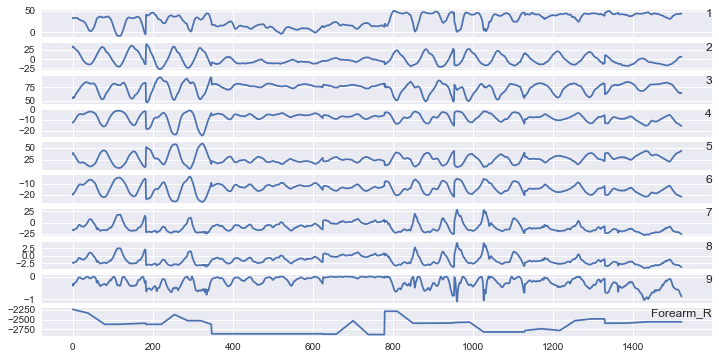

In [135]:
dataset = pd.concat([full['1'],full['2'],full['3'],full['4'],full['5'],full['6'],full['7'],full['8'],full['9'],full['Forearm_R']] , axis=1 )
dataset.head()
type(dataset)
import matplotlib.pyplot as plt
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3,4,5,6,7,8,9]
i=1
plt.figure(figsize=(12,6))
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [136]:
from sklearn.preprocessing import MinMaxScaler
values = dataset.values
values = dataset.astype(np.float32)#inverse的关键一步。why？？
n_features=9

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)


train = scaled[:900,:]
val = scaled[900:1200,:]
test = scaled[1200:,:]



train_X,train_y = train[:,:n_features],train[:,-1]
val_X,val_y = val[:,:n_features],val[:,-1]#第一个多少行
test_X,test_y = test[:,:n_features],test[:,-1]
print(train_X.shape,train_y.shape)

(900, 9) (900,)


In [137]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn import model_selection

rf = RandomForestRegressor(n_estimators=190, 
                           max_features= 'sqrt',verbose= 0 )
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
gbm = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2000,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

lgb = LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


In [147]:
print('5-fold cross validation:\n')
stack = StackingCVRegressor(regressors=(ENet,rf,lasso,ENet, KRR, lgb, gbm), 
                          meta_regressor=xgb)

for clf, label in zip([lasso,rf,xgb, ENet, KRR, gbm, lgb, stack], 
                      ['lasso',
                       'rf',
                       'XGBRegressor', 
                       'ENet', 
                       'KRR',
                       'GBM',
                       'lgb',
                       'stack']):
    n_folds = 5
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_X)
    scores = np.sqrt(-model_selection.cross_val_score(clf, train_X, train_y, 
                                              cv=kf,scoring='neg_mean_squared_error'))
    print("Accuracy: %0.4f (+/- %0.4f) [%s]" 
          % (scores.mean(), scores.std(), label))


5-fold cross validation:

Accuracy: 0.2022 (+/- 0.0518) [lasso]
Accuracy: 0.2124 (+/- 0.0440) [rf]
Accuracy: 0.2271 (+/- 0.0472) [XGBRegressor]
Accuracy: 0.2023 (+/- 0.0518) [ENet]
Accuracy: 0.2336 (+/- 0.0654) [KRR]
Accuracy: 0.2384 (+/- 0.0449) [GBM]
Accuracy: 0.2326 (+/- 0.0348) [lgb]
Accuracy: 0.2101 (+/- 0.0431) [stack]


In [148]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))
stack.fit(train_X, train_y)
#sclf_pred = sclf.predict(X_train.values)
stack_train_pred = stack.predict(train_X)
stack_pred = stack.predict(val_X)
print(rmsle(train_y, stack_train_pred))

0.058087317557760386


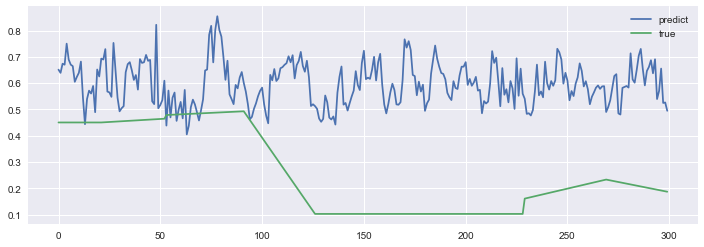

In [146]:
plt.figure()
plt.plot(stack_pred, label = 'predict')
plt.plot(val_y, label = 'true')
plt.legend()
plt.show()

In [133]:
from numpy import concatenate
res_pred = stack_pred.reshape(-1,1)
inv_pred_con = concatenate((val[:,0:9],res_pred), axis=1)
inv_pred = scaler.inverse_transform(inv_pred_con)
inv_pred = inv_pred[:,-1] 


res_y = val_y.reshape(-1,1)
inv_y_con = concatenate(( val[:,0:9],res_y), axis=1)
inv_y = scaler.inverse_transform(inv_y_con)
inv_y = inv_y[:,-1]

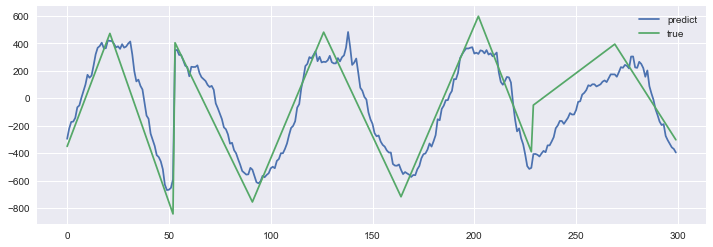

In [134]:
plt.figure()
plt.plot(inv_pred, label = 'predict')
plt.plot(inv_y, label = 'true')
plt.legend()
plt.show()